In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

plt.rcParams['figure.figsize'] = [22, 12]

In [59]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

In [60]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

In [61]:
df_train=pd.read_csv('Flights_Weather_TRAIN.csv')
df_test=pd.read_csv('Flights_Weather_TEST.csv')

In [62]:
df_test.fl_date.nunique()

7

In [63]:
df_train

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,origin_city,dest_city,dep_datetime,arr_datetime,dep_Rain,dep_Fog,dep_Snow,dep_Cold,dep_Storm,dep_Hail,dep_Precipitation,arr_Rain,arr_Fog,arr_Snow,arr_Cold,arr_Storm,arr_Hail,arr_Precipitation
0,0,2019-01-07,AA,AA_CODESHARE,AA,2989,OO,N744EV,2989,11049,CLL,"College Station/Bryan, TX",11298,DFW,"Dallas/Fort Worth, TX",502,610,N,68,1,164,NaN,College Station,Dallas,2019-01-07 05:02:00,2019-01-07 06:10:00,NW,NW,NW,NW,NW,NW,NW,Light,NW,NW,NW,NW,NW,NW
1,1,2019-01-07,UA,UA_CODESHARE,UA,3827,ZW,N424AW,3827,13367,MLI,"Moline, IL",13930,ORD,"Chicago, IL",1045,1150,N,65,1,139,2.0,Moline,Chicago,2019-01-07 10:45:00,2019-01-07 11:50:00,NW,NW,NW,NW,NW,NW,NW,Light,NW,NW,NW,NW,NW,NW
2,2,2019-01-07,DL,DL_CODESHARE,DL,3803,OO,N291SY,3803,13930,ORD,"Chicago, IL",12953,LGA,"New York, NY",1930,2243,N,133,1,733,10.0,Chicago,New York,2019-01-07 19:30:00,2019-01-07 22:43:00,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW
3,3,2019-01-07,DL,DL_CODESHARE,DL,3804,OO,N272SY,3804,13930,ORD,"Chicago, IL",12953,LGA,"New York, NY",1130,1438,N,128,1,733,55.0,Chicago,New York,2019-01-07 11:30:00,2019-01-07 14:38:00,Light,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW
4,4,2019-01-07,DL,DL_CODESHARE,DL,3805,OO,N290SY,3805,11996,GSP,"Greer, SC",12953,LGA,"New York, NY",600,759,N,119,1,610,-14.0,Greer,New York,2019-01-07 06:00:00,2019-01-07 07:59:00,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144453,144453,2019-01-01,AA,AA,AA,1191,AA,N158AN,1191,11298,DFW,"Dallas/Fort Worth, TX",12953,LGA,"New York, NY",1754,2210,N,196,1,1389,-14.0,Dallas,New York,2019-01-01 17:54:00,2019-01-01 22:10:00,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW
144454,144454,2019-01-01,AA,AA,AA,1193,AA,N355PU,1193,13930,ORD,"Chicago, IL",14107,PHX,"Phoenix, AZ",2010,2308,N,238,1,1440,42.0,Chicago,Phoenix,2019-01-01 20:10:00,2019-01-01 23:08:00,NW,NW,Light,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW
144455,144455,2019-01-01,AA,AA,AA,1194,AA,N931NN,1194,13204,MCO,"Orlando, FL",13303,MIA,"Miami, FL",1934,2048,N,74,1,192,-13.0,Orlando,Miami,2019-01-01 19:34:00,2019-01-01 20:48:00,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW
144456,144456,2019-01-01,AA,AA,AA,1194,AA,N931NN,1194,13303,MIA,"Miami, FL",13204,MCO,"Orlando, FL",1735,1849,N,74,1,192,-15.0,Miami,Orlando,2019-01-01 17:35:00,2019-01-01 18:49:00,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW


In [69]:
arr_time_to_hr=pd.read_csv('arr_time_to_hr.csv')

In [70]:
arr_time_to_hr

,arr_time,arr_hr
0,1.0,0.0
1,2.0,0.0
2,3.0,0.0
3,4.0,0.0
4,5.0,0.0
...,...,...
1436,2357.0,23.0
1437,2358.0,23.0
1438,2359.0,23.0
1439,2400.0,0.0


In [71]:
df_train=df_train.merge(arr_time_to_hr, left_on='crs_arr_time', right_on='arr_time')

In [90]:
dftr=df_train.copy()
dftr

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,origin_city,dest_city,dep_datetime,arr_datetime,dep_Rain,dep_Fog,dep_Snow,dep_Cold,dep_Storm,dep_Hail,dep_Precipitation,arr_Rain,arr_Fog,arr_Snow,arr_Cold,arr_Storm,arr_Hail,arr_Precipitation,arr_time,arr_hr
0,0,2019-01-07,AA,AA_CODESHARE,AA,2989,OO,N744EV,2989,11049,CLL,"College Station/Bryan, TX",11298,DFW,"Dallas/Fort Worth, TX",502,610,N,68,1,164,NaN,College Station,Dallas,2019-01-07 05:02:00,2019-01-07 06:10:00,NW,NW,NW,NW,NW,NW,NW,Light,NW,NW,NW,NW,NW,NW,610.0,6.0
1,1405,2019-01-07,AS,AS,AS,378,AS,N472AS,378,14679,SAN,"San Diego, CA",10821,BWI,"Baltimore, MD",2210,610,N,300,1,2295,-1.0,San Diego,Baltimore,2019-01-07 22:10:00,2019-01-08 06:10:00,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,610.0,6.0
2,3468,2019-01-07,AA,AA,AA,103,AA,N306NY,103,14122,PIT,"Pittsburgh, PA",13930,ORD,"Chicago, IL",518,610,N,112,1,413,-27.0,Pittsburgh,Chicago,2019-01-07 05:18:00,2019-01-07 06:10:00,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,610.0,6.0
3,5459,2019-01-07,AS,AS_CODESHARE,AS,3464,OO,N404SY,3464,10713,BOI,"Boise, ID",14057,PDX,"Portland, OR",545,610,N,85,1,344,8.0,Boise,Portland,2019-01-07 05:45:00,2019-01-07 06:10:00,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,610.0,6.0
4,13207,2019-01-07,AA,AA,AA,1940,AA,N920US,1940,12892,LAX,"Los Angeles, CA",13204,MCO,"Orlando, FL",2225,610,N,285,1,2218,-21.0,Los Angeles,Orlando,2019-01-07 22:25:00,2019-01-08 06:10:00,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,610.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144453,139141,2019-01-01,AA,AA,AA,2191,AA,N827AW,2191,14107,PHX,"Phoenix, AZ",14683,SAT,"San Antonio, TX",2259,204,N,125,1,843,-3.0,Phoenix,San Antonio,2019-01-01 22:59:00,2019-01-02 02:04:00,NW,NW,NW,NW,NW,NW,NW,Light,NW,NW,NW,NW,NW,NW,204.0,2.0
144454,139308,2019-01-01,AA,AA_CODESHARE,AA,3913,MQ,N838AE,3913,11298,DFW,"Dallas/Fort Worth, TX",11193,CVG,"Cincinnati, OH",2359,309,N,130,1,812,-12.0,Dallas,Cincinnati,2019-01-01 23:59:00,2019-01-02 03:09:00,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,309.0,3.0
144455,139373,2019-01-01,AA,AA,AA,1768,AA,N659AW,1768,11298,DFW,"Dallas/Fort Worth, TX",11433,DTW,"Detroit, MI",2359,330,N,151,1,986,14.0,Dallas,Detroit,2019-01-01 23:59:00,2019-01-02 03:30:00,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,330.0,3.0
144456,142267,2019-01-01,AA,AA_CODESHARE,AA,4414,YX,N130HQ,4414,11057,CLT,"Charlotte, NC",12124,HHH,"Hilton Head, SC",2359,104,N,65,1,207,-4.0,Charlotte,Hilton Head,2019-01-01 23:59:00,2019-01-02 01:04:00,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,NW,104.0,1.0


In [74]:
# delting the cells i don't need
del_lst=['mkt_carrier','mkt_carrier_fl_num', 'op_unique_carrier','tail_num','op_carrier_fl_num','origin_airport_id','origin_city_name','dest_airport_id','dest_city_name','dup','crs_arr_time','origin_city','dest_city','arr_time_x','arr_hr_x','arr_time_y','arr_hr_y','arr_time']

In [75]:
def deleter_col(df,lst):
    for col in lst:
        del df[col]
    return df

In [ ]:
deleter_col(dftr, del_lst)

In [92]:
ord_lst=['dep_Rain','dep_Fog','dep_Snow','dep_Cold','dep_Storm','dep_Hail','dep_Precipitation','arr_Rain','arr_Fog','arr_Snow','arr_Cold','arr_Storm','arr_Hail','arr_Precipitation']

In [93]:
from sklearn.preprocessing import OrdinalEncoder

#takes a list
def ordinal_encoder_function(df, lst):
    encoder=OrdinalEncoder()
    for column in lst:
        a=df[column].values.reshape(-1, 1)
        result = encoder.fit_transform(a)
        df[column]=pd.DataFrame(data=result)
    return df

In [94]:
ordinal_encoder_function(dftr, ord_lst)

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,origin_city,dest_city,dep_datetime,arr_datetime,dep_Rain,dep_Fog,dep_Snow,dep_Cold,dep_Storm,dep_Hail,dep_Precipitation,arr_Rain,arr_Fog,arr_Snow,arr_Cold,arr_Storm,arr_Hail,arr_Precipitation,arr_time,arr_hr
0,0,2019-01-07,AA,AA_CODESHARE,AA,2989,OO,N744EV,2989,11049,CLL,"College Station/Bryan, TX",11298,DFW,"Dallas/Fort Worth, TX",502,610,N,68,1,164,NaN,College Station,Dallas,2019-01-07 05:02:00,2019-01-07 06:10:00,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,610.0,6.0
1,1405,2019-01-07,AS,AS,AS,378,AS,N472AS,378,14679,SAN,"San Diego, CA",10821,BWI,"Baltimore, MD",2210,610,N,300,1,2295,-1.0,San Diego,Baltimore,2019-01-07 22:10:00,2019-01-08 06:10:00,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,610.0,6.0
2,3468,2019-01-07,AA,AA,AA,103,AA,N306NY,103,14122,PIT,"Pittsburgh, PA",13930,ORD,"Chicago, IL",518,610,N,112,1,413,-27.0,Pittsburgh,Chicago,2019-01-07 05:18:00,2019-01-07 06:10:00,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,610.0,6.0
3,5459,2019-01-07,AS,AS_CODESHARE,AS,3464,OO,N404SY,3464,10713,BOI,"Boise, ID",14057,PDX,"Portland, OR",545,610,N,85,1,344,8.0,Boise,Portland,2019-01-07 05:45:00,2019-01-07 06:10:00,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,610.0,6.0
4,13207,2019-01-07,AA,AA,AA,1940,AA,N920US,1940,12892,LAX,"Los Angeles, CA",13204,MCO,"Orlando, FL",2225,610,N,285,1,2218,-21.0,Los Angeles,Orlando,2019-01-07 22:25:00,2019-01-08 06:10:00,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,610.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144453,139141,2019-01-01,AA,AA,AA,2191,AA,N827AW,2191,14107,PHX,"Phoenix, AZ",14683,SAT,"San Antonio, TX",2259,204,N,125,1,843,-3.0,Phoenix,San Antonio,2019-01-01 22:59:00,2019-01-02 02:04:00,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,204.0,2.0
144454,139308,2019-01-01,AA,AA_CODESHARE,AA,3913,MQ,N838AE,3913,11298,DFW,"Dallas/Fort Worth, TX",11193,CVG,"Cincinnati, OH",2359,309,N,130,1,812,-12.0,Dallas,Cincinnati,2019-01-01 23:59:00,2019-01-02 03:09:00,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,309.0,3.0
144455,139373,2019-01-01,AA,AA,AA,1768,AA,N659AW,1768,11298,DFW,"Dallas/Fort Worth, TX",11433,DTW,"Detroit, MI",2359,330,N,151,1,986,14.0,Dallas,Detroit,2019-01-01 23:59:00,2019-01-02 03:30:00,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,330.0,3.0
144456,142267,2019-01-01,AA,AA_CODESHARE,AA,4414,YX,N130HQ,4414,11057,CLT,"Charlotte, NC",12124,HHH,"Hilton Head, SC",2359,104,N,65,1,207,-4.0,Charlotte,Hilton Head,2019-01-01 23:59:00,2019-01-02 01:04:00,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,104.0,1.0


In [95]:
bins=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
label=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

In [96]:
dftr['crs_dep_time']= pd.cut(dftr['crs_dep_time'], bins=bins, labels=label)

In [100]:
dftr['crs_elapsed_time']= pd.cut(dftr['crs_elapsed_time'], bins=bins, labels=label)

In [102]:
#delete some more stuff
del dftr['Unnamed: 0']
del dftr['dep_datetime']
del dftr['arr_datetime']

In [118]:
del dftr['arr_time']

In [120]:
dff=dftr.copy()
dff

,fl_date,mkt_unique_carrier,branded_code_share,origin,dest,crs_dep_time,crs_elapsed_time,flights,distance,arr_delay,dep_Rain,dep_Fog,dep_Snow,dep_Cold,dep_Storm,dep_Hail,dep_Precipitation,arr_Rain,arr_Fog,arr_Snow,arr_Cold,arr_Storm,arr_Hail,arr_Precipitation,arr_hr
0,2019-01-07,AA,AA_CODESHARE,CLL,DFW,6,1,1,164,NaN,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0
1,2019-01-07,AS,AS,SAN,BWI,23,3,1,2295,-1.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0
2,2019-01-07,AA,AA,PIT,ORD,6,2,1,413,-27.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0
3,2019-01-07,AS,AS_CODESHARE,BOI,PDX,6,1,1,344,8.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0
4,2019-01-07,AA,AA,LAX,MCO,23,3,1,2218,-21.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144453,2019-01-01,AA,AA,PHX,SAT,23,2,1,843,-3.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,2.0
144454,2019-01-01,AA,AA_CODESHARE,DFW,CVG,24,2,1,812,-12.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0
144455,2019-01-01,AA,AA,DFW,DTW,24,2,1,986,14.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0
144456,2019-01-01,AA,AA_CODESHARE,CLT,HHH,24,1,1,207,-4.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0


In [131]:
dff['fl_date'] = pd.to_datetime(dff['fl_date'], 
 format = '%Y-%m-%d', 
 errors = 'coerce')

In [132]:
dff['ScheduledDay_dayofweek']=dff['fl_date'].dt.dayofweek
dff['ScheduledDay_month']=dff['fl_date'].dt.month


In [133]:
df_train_export=dff.copy()
df_train_export

,fl_date,mkt_unique_carrier,branded_code_share,origin,dest,crs_dep_time,crs_elapsed_time,flights,distance,arr_delay,dep_Rain,dep_Fog,dep_Snow,dep_Cold,dep_Storm,dep_Hail,dep_Precipitation,arr_Rain,arr_Fog,arr_Snow,arr_Cold,arr_Storm,arr_Hail,arr_Precipitation,arr_hr,ScheduledDay_dayofweek,ScheduledDay_month
0,2019-01-07,AA,AA_CODESHARE,CLL,DFW,6,1,1,164,NaN,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0,0,1
1,2019-01-07,AS,AS,SAN,BWI,23,3,1,2295,-1.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0,0,1
2,2019-01-07,AA,AA,PIT,ORD,6,2,1,413,-27.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0,0,1
3,2019-01-07,AS,AS_CODESHARE,BOI,PDX,6,1,1,344,8.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0,0,1
4,2019-01-07,AA,AA,LAX,MCO,23,3,1,2218,-21.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144453,2019-01-01,AA,AA,PHX,SAT,23,2,1,843,-3.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,2.0,1,1
144454,2019-01-01,AA,AA_CODESHARE,DFW,CVG,24,2,1,812,-12.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1,1
144455,2019-01-01,AA,AA,DFW,DTW,24,2,1,986,14.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1,1
144456,2019-01-01,AA,AA_CODESHARE,CLT,HHH,24,1,1,207,-4.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1,1


In [134]:
gfg_csv_data = df_train_export.to_csv('df_train_lazar.csv')#sql

In [135]:
#sql=
'''select trunc((case when f.arr_time = 2400 then 0 else f.arr_time end)/100.0) hr, 
	avg(arr_delay) arr_delay_average, 
	count(arr_delay)
from flights f
	where arr_delay >0
group by hr
order by 1;'''

depdelay_time=pd.read_csv('depdelay_hr.csv')
depdelay_time

,hr,arr_delay_average,count
0,0.0,63.376504,211461
1,1.0,101.941921,83748
2,2.0,149.098383,29243
3,3.0,199.338693,9516
4,4.0,132.682714,6543
5,5.0,32.146987,21655
6,6.0,21.354690,50258
7,7.0,21.402089,110938
8,8.0,24.496698,166719
9,9.0,26.485408,229784


<AxesSubplot:xlabel='hr', ylabel='arr_delay_average'>

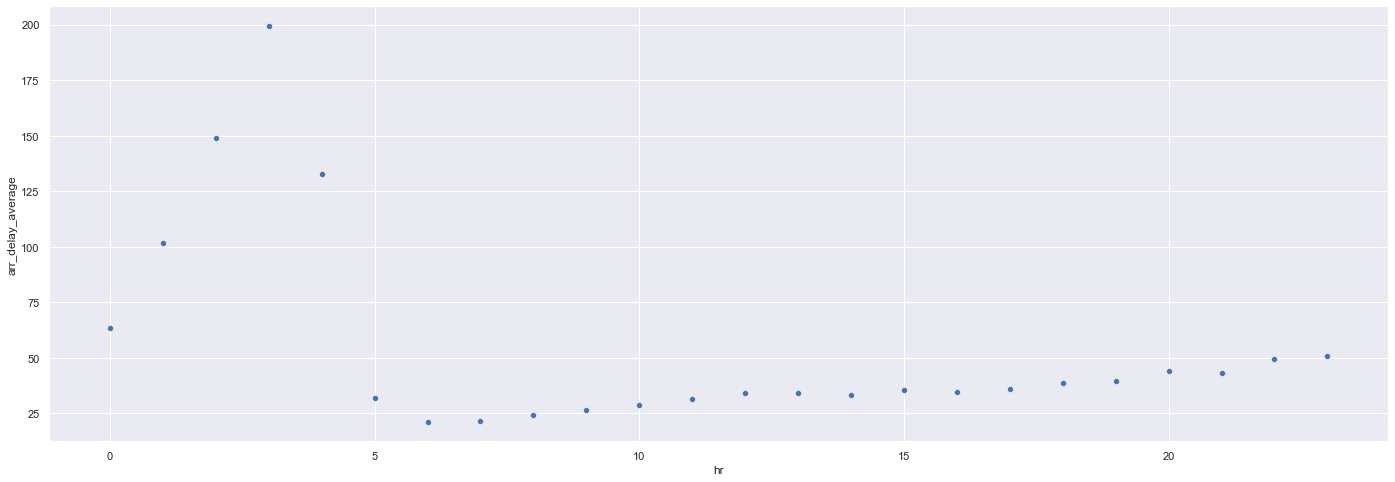

In [139]:
sns.set(rc={"figure.figsize":(24, 8)}) 
sns.scatterplot(x=depdelay_time['hr'], y=depdelay_time['arr_delay_average'])

<AxesSubplot:xlabel='hr', ylabel='count'>

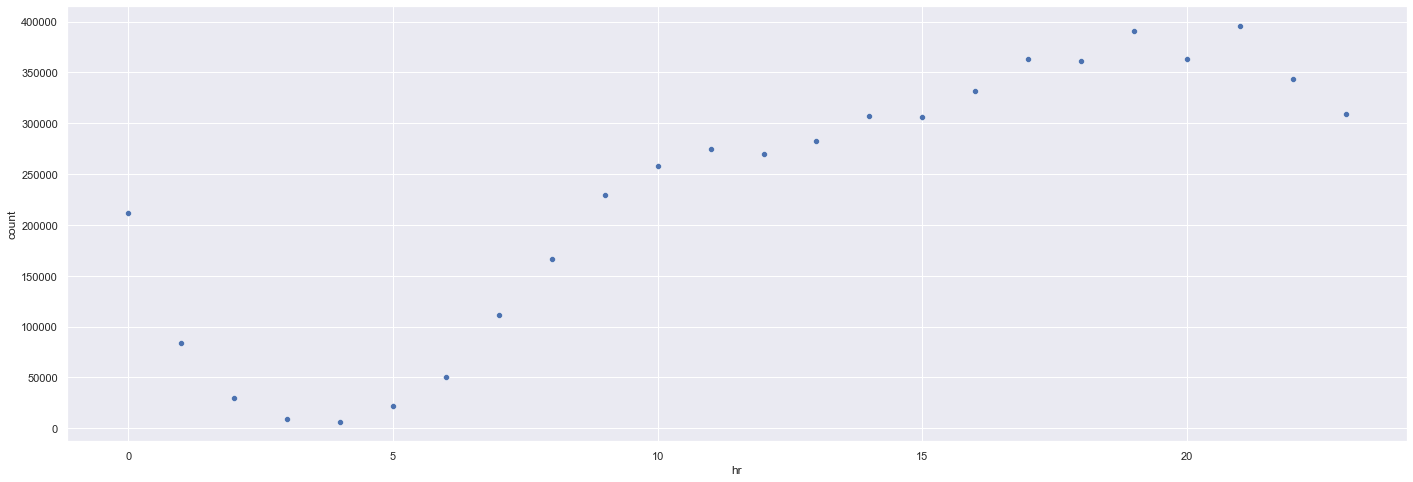

In [138]:
sns.set(rc={"figure.figsize":(24, 8)}) 
sns.scatterplot(x=depdelay_time['hr'], y=depdelay_time['count'])

In [144]:
#sql=
'''select trunc((case when f.arr_time = 2400 then 0 else f.arr_time end)/100.0) hr, 
	avg(arr_delay) arr_delay_average, 
	count(*) count_all
from flights f
group by hr
order by 1;'''
df_all=pd.read_csv('all.csv')
df_all.head(2)

,hr,arr_delay_average,count_all
0,0.0,39.269194,313641
1,1.0,84.554338,100185


<AxesSubplot:xlabel='hr', ylabel='count_all'>

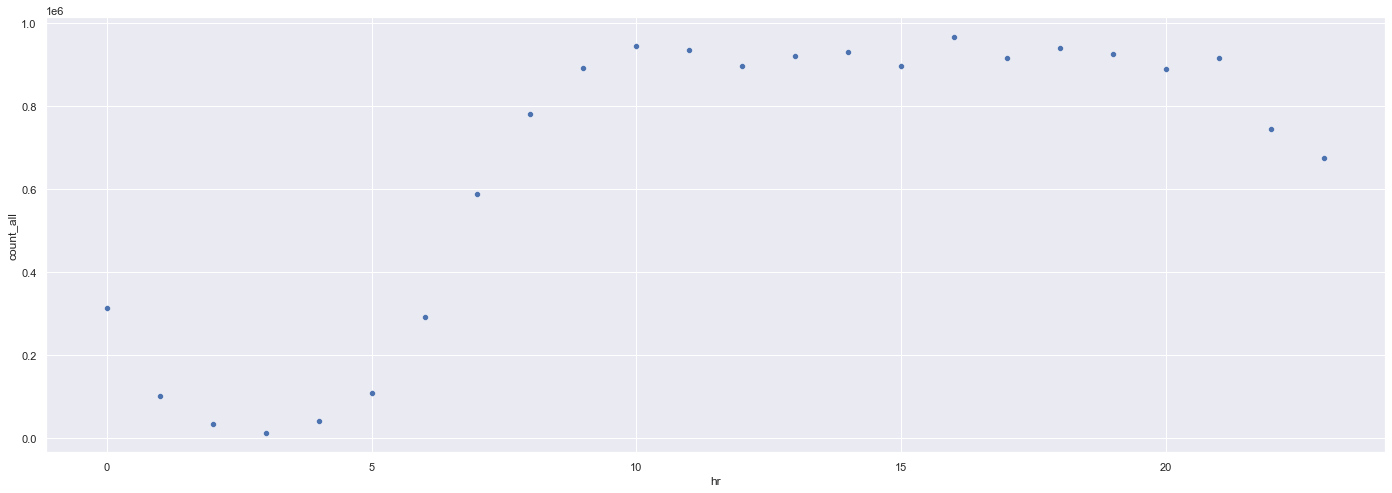

In [142]:
sns.set(rc={"figure.figsize":(24, 8)}) 
sns.scatterplot(x=df_all['hr'], y=df_all['count_all'])


<AxesSubplot:xlabel='hr', ylabel='arr_delay_average'>

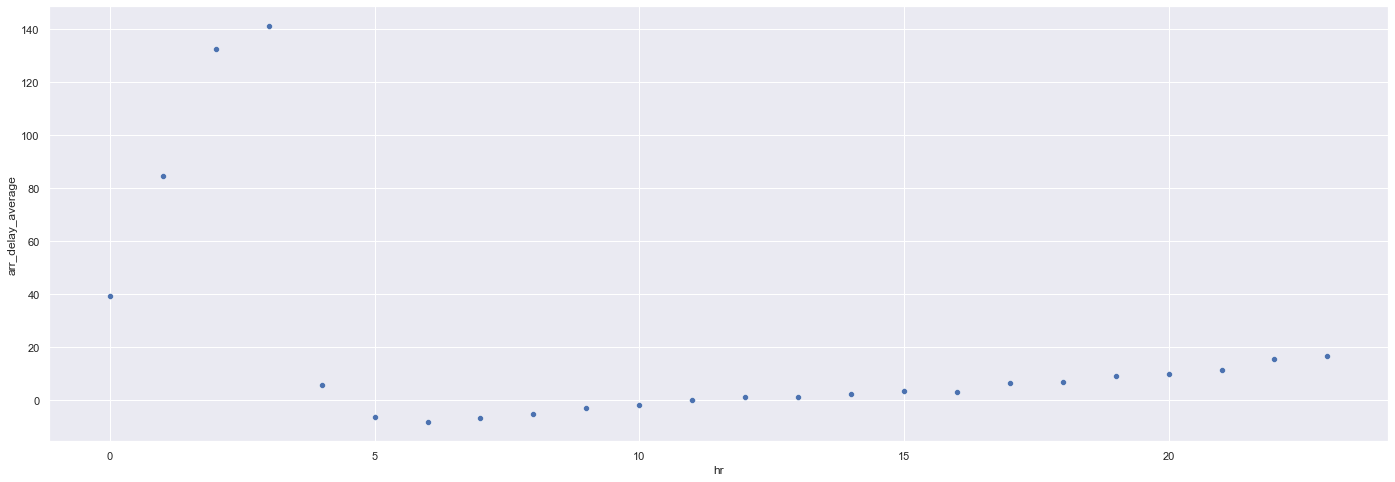

In [143]:
sns.set(rc={"figure.figsize":(24, 8)}) 
sns.scatterplot(x=df_all['hr'], y=df_all['arr_delay_average'])

,mon,avg,median,min,max,count
0,Jan,3.958788,-7.0,-1290.0,2023.0,1217645
1,Feb,6.745096,-6.0,-94.0,2649.0,1117101
2,Mar,2.818773,-7.0,-106.0,2923.0,1319416
3,Apr,4.159131,-7.0,-99.0,2075.0,1291045
4,May,6.511144,-6.0,-75.0,1724.0,1338917
5,Jun,10.414444,-4.0,-98.0,2041.0,1344173
6,Jul,8.977515,-5.0,-88.0,2692.0,1386889
7,Aug,8.898890,-5.0,-94.0,1843.0,1387085
8,Sep,1.708452,-8.0,-94.0,2635.0,1274917
9,Oct,2.853585,-7.0,-104.0,2153.0,1348965
